<a href="https://colab.research.google.com/github/DhanushSM/DhanushSM/blob/main/energy_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

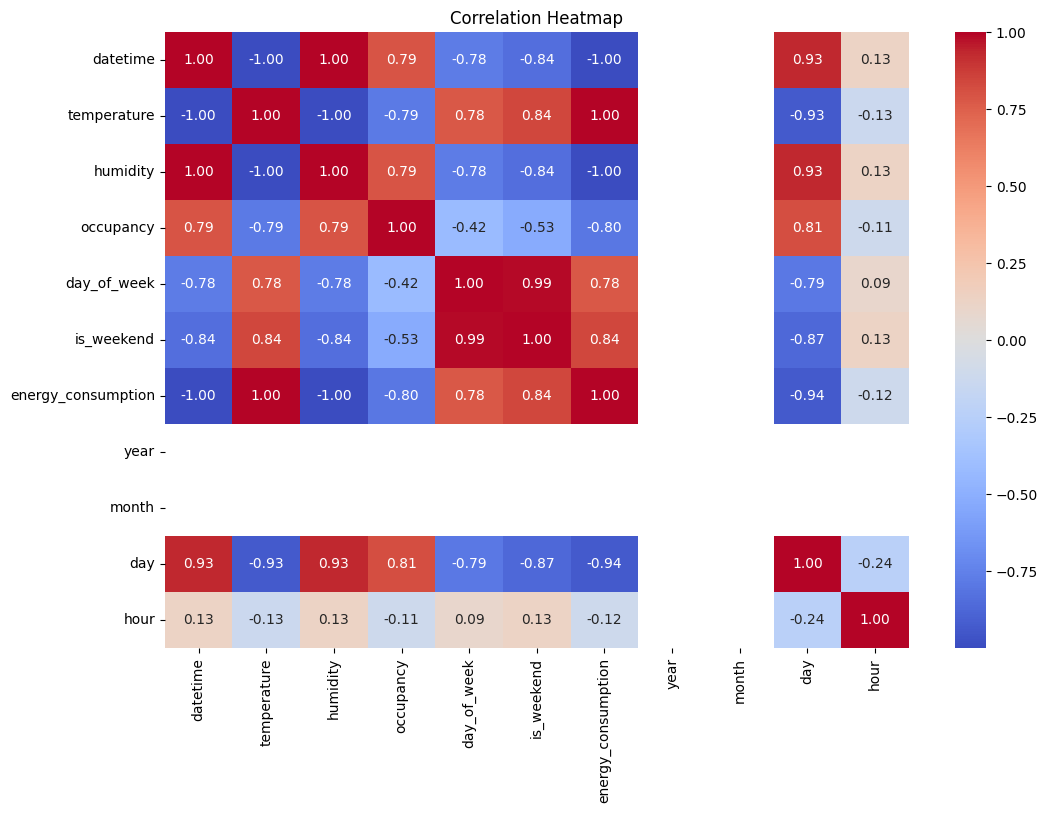

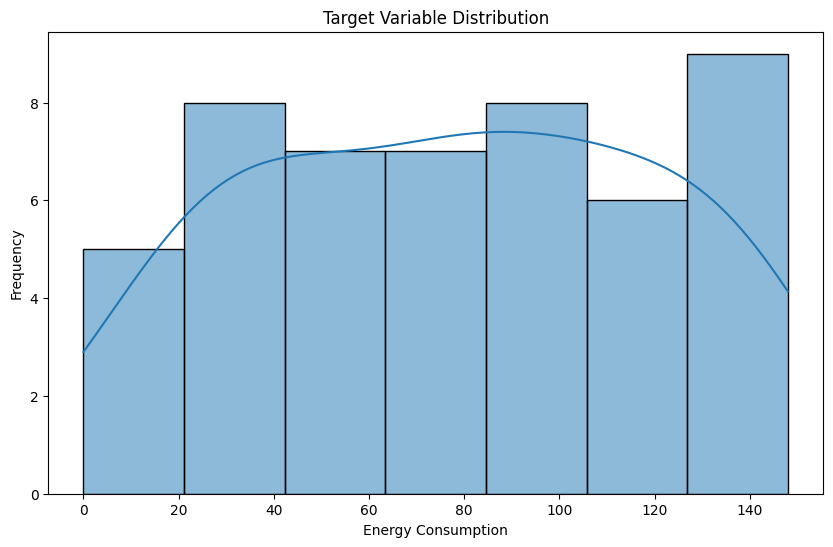

Linear Regression - MAE: 0.73, MSE: 0.89, RMSE: 0.95
Random Forest - MAE: 0.93, MSE: 2.18, RMSE: 1.48
Tuned Random Forest - MAE: 0.93, MSE: 2.18, RMSE: 1.48


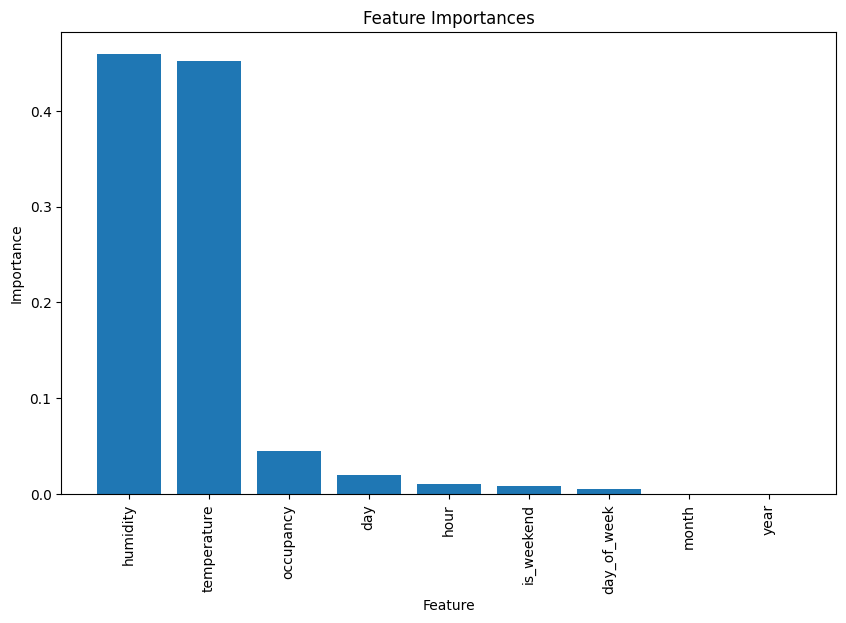

Predictions on new data:  [  2.81  13.01 145.59  47.74 140.3 ]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Step 1: Data Collection
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        logging.info("Data loaded successfully.")
        return df
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        return None

# Step 2: Data Preprocessing
def preprocess_data(df):
    try:
        # Convert 'datetime' column to datetime format
        df['datetime'] = pd.to_datetime(df['datetime'])

        # Feature engineering: Extract useful features from 'datetime'
        df['year'] = df['datetime'].dt.year
        df['month'] = df['datetime'].dt.month
        df['day'] = df['datetime'].dt.day
        df['hour'] = df['datetime'].dt.hour
        df['day_of_week'] = df['datetime'].dt.dayofweek  # Replace existing 'day_of_week' column
        df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Replace existing 'is_weekend' column

        # Drop the original 'datetime' column
        df = df.drop('datetime', axis=1)

        # Handle missing values (only for numeric columns)
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

        # Define features and target variable
        X = df.drop('energy_consumption', axis=1)
        y = df['energy_consumption']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        logging.info("Data preprocessing completed.")
        return X_train, X_test, y_train, y_test, X.columns
    except Exception as e:
        logging.error(f"Error preprocessing data: {e}")
        return None, None, None, None, None

# Step 3: Model Training
def train_model(X_train, y_train):
    try:
        # Initialize models
        linear_model = LinearRegression()
        rf_model = RandomForestRegressor(random_state=42)

        # Train models
        linear_model.fit(X_train, y_train)
        rf_model.fit(X_train, y_train)

        logging.info("Models trained successfully.")
        return linear_model, rf_model
    except Exception as e:
        logging.error(f"Error training models: {e}")
        return None, None

# Step 4: Model Evaluation
def evaluate_model(model, X_test, y_test):
    try:
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        logging.info("Model evaluation completed.")
        return mae, mse, rmse
    except Exception as e:
        logging.error(f"Error evaluating model: {e}")
        return None, None, None

# Step 5: Model Tuning (example using Random Forest)
def tune_model(X_train, y_train):
    try:
        rf_model = RandomForestRegressor(random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        logging.info("Model tuning completed.")
        return best_model
    except Exception as e:
        logging.error(f"Error tuning model: {e}")
        return None

# Step 6: Feature Importance
def plot_feature_importance(model, feature_names):
    try:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title("Feature Importances")
        plt.bar(range(len(importances)), importances[indices], align="center")
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.show()
        logging.info("Feature importance plotted.")
    except Exception as e:
        logging.error(f"Error plotting feature importance: {e}")

# Step 7: Model Deployment (making predictions on new data)
def make_predictions(model, new_data):
    try:
        predictions = model.predict(new_data)
        logging.info("Predictions made successfully.")
        return predictions
    except Exception as e:
        logging.error(f"Error making predictions: {e}")
        return None

# Additional Visualizations
def plot_correlation_heatmap(df):
    try:
        plt.figure(figsize=(12, 8))
        sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()
        logging.info("Correlation heatmap plotted.")
    except Exception as e:
        logging.error(f"Error plotting correlation heatmap: {e}")

def plot_target_distribution(y):
    try:
        plt.figure(figsize=(10, 6))
        sns.histplot(y, kde=True)
        plt.title("Target Variable Distribution")
        plt.xlabel("Energy Consumption")
        plt.ylabel("Frequency")
        plt.show()
        logging.info("Target variable distribution plotted.")
    except Exception as e:
        logging.error(f"Error plotting target variable distribution: {e}")

if __name__ == "__main__":
    # Load and preprocess data
    file_path = 'energy_consumption_data.csv'  # Replace with your dataset path
    df = load_data(file_path)
    if df is not None:
        X_train, X_test, y_train, y_test, feature_names = preprocess_data(df)
        if X_train is not None:
            # Plot correlation heatmap
            plot_correlation_heatmap(df)

            # Plot target variable distribution
            plot_target_distribution(y_train)

            # Train models
            linear_model, rf_model = train_model(X_train, y_train)
            if linear_model is not None and rf_model is not None:
                # Evaluate models
                linear_mae, linear_mse, linear_rmse = evaluate_model(linear_model, X_test, y_test)
                rf_mae, rf_mse, rf_rmse = evaluate_model(rf_model, X_test, y_test)

                print("Linear Regression - MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}".format(linear_mae, linear_mse, linear_rmse))
                print("Random Forest - MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}".format(rf_mae, rf_mse, rf_rmse))

                # Tune Random Forest model
                best_rf_model = tune_model(X_train, y_train)
                if best_rf_model is not None:
                    best_rf_mae, best_rf_mse, best_rf_rmse = evaluate_model(best_rf_model, X_test, y_test)
                    print("Tuned Random Forest - MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}".format(best_rf_mae, best_rf_mse, best_rf_rmse))

                    # Plot feature importance
                    plot_feature_importance(best_rf_model, feature_names)

                    # Example of making predictions on new data
                    new_data = X_test[:5]  # Replace with actual new data
                    predictions = make_predictions(best_rf_model, new_data)
                    if predictions is not None:
                        print("Predictions on new data: ", predictions)

Linear Regression - MAE: 0.73, MSE: 0.89, RMSE: 0.95
Random Forest - MAE: 0.93, MSE: 2.18, RMSE: 1.48


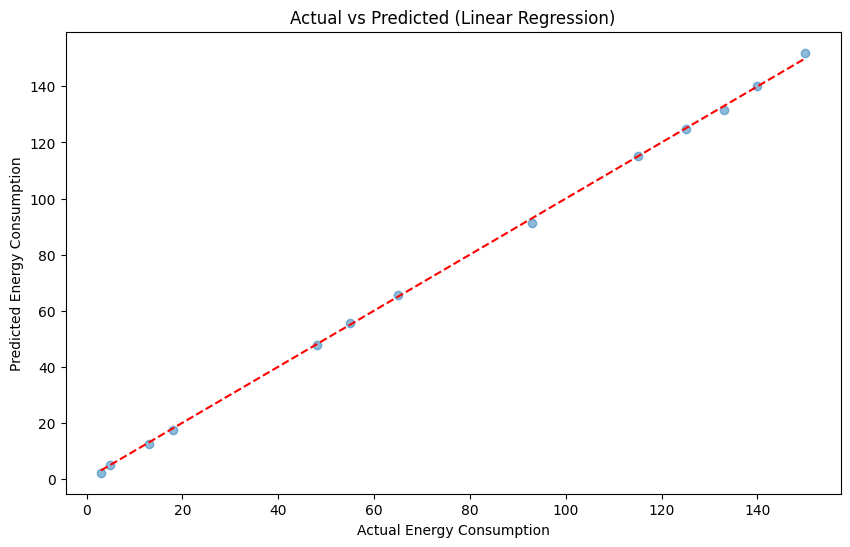

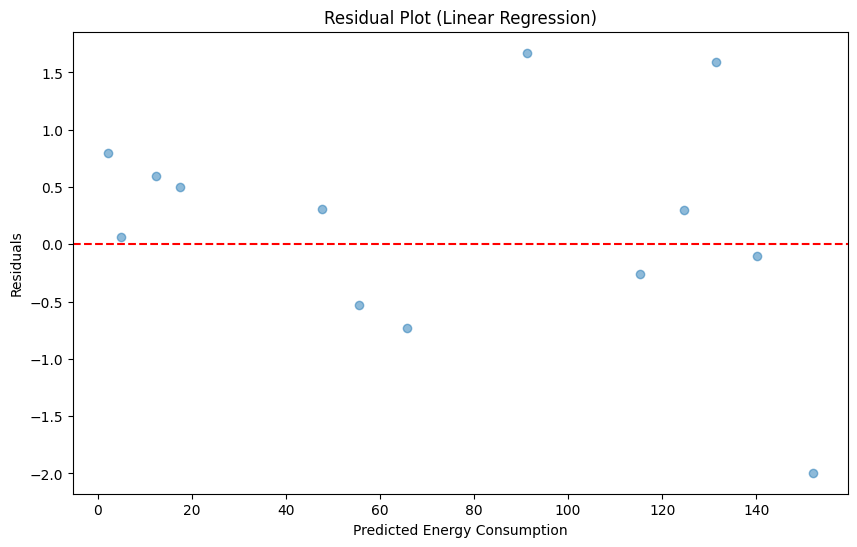

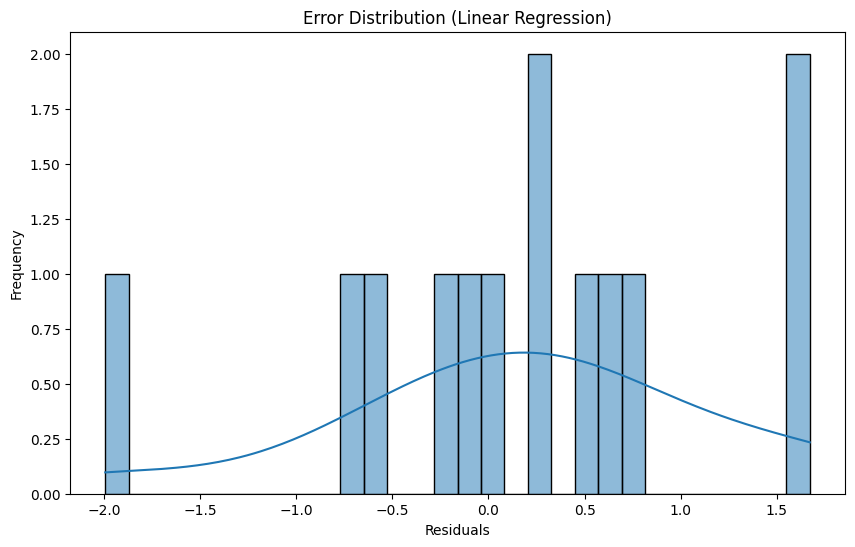

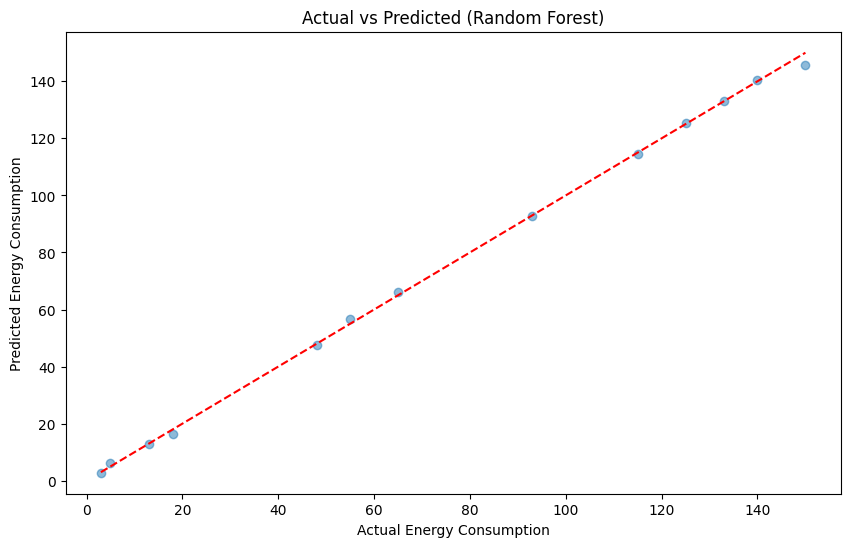

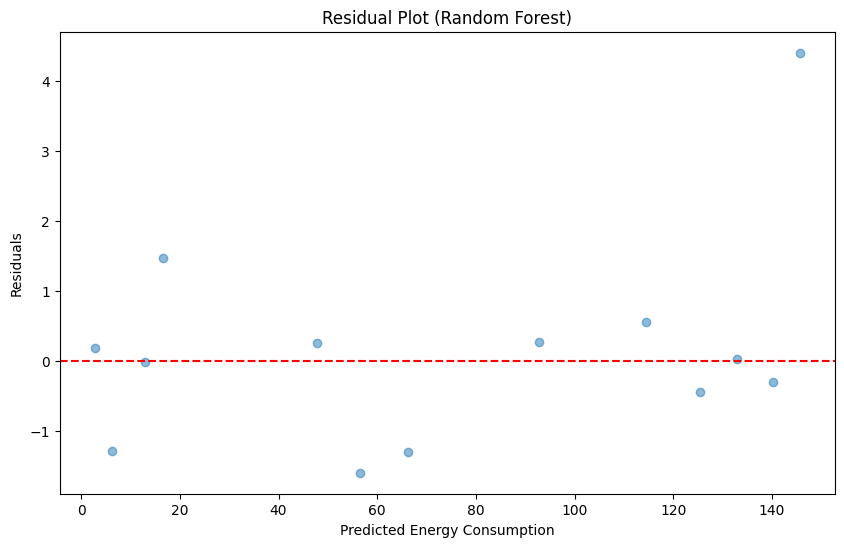

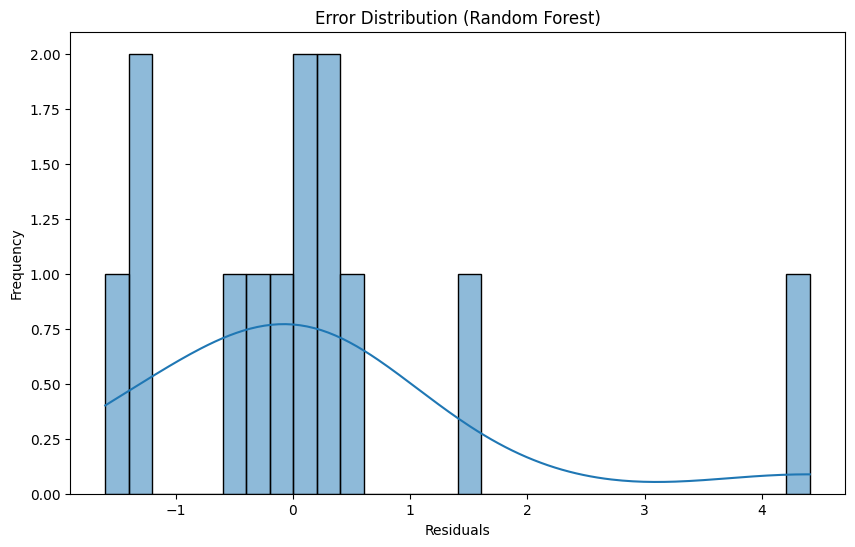

Tuned Random Forest - MAE: 0.93, MSE: 2.18, RMSE: 1.48


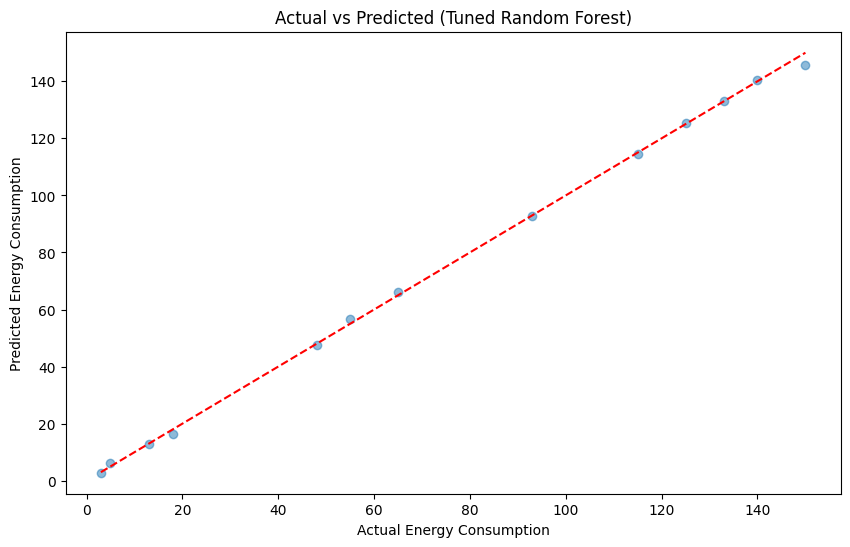

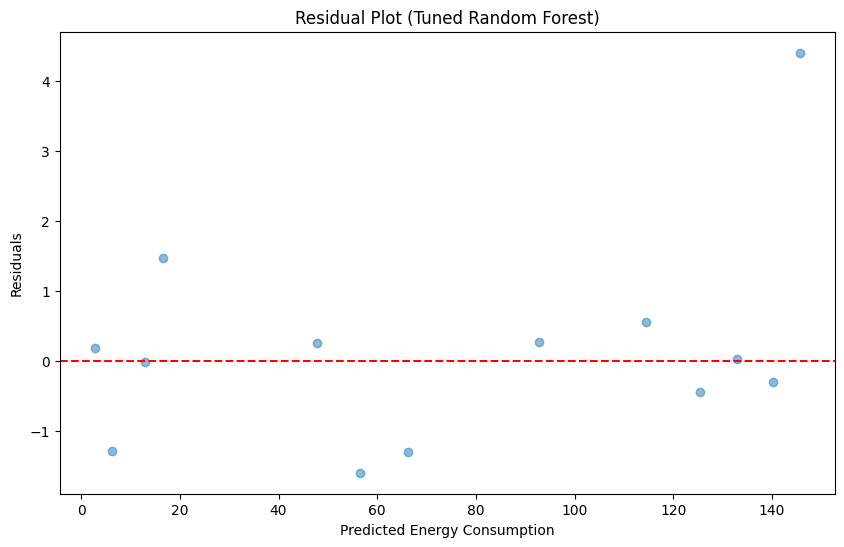

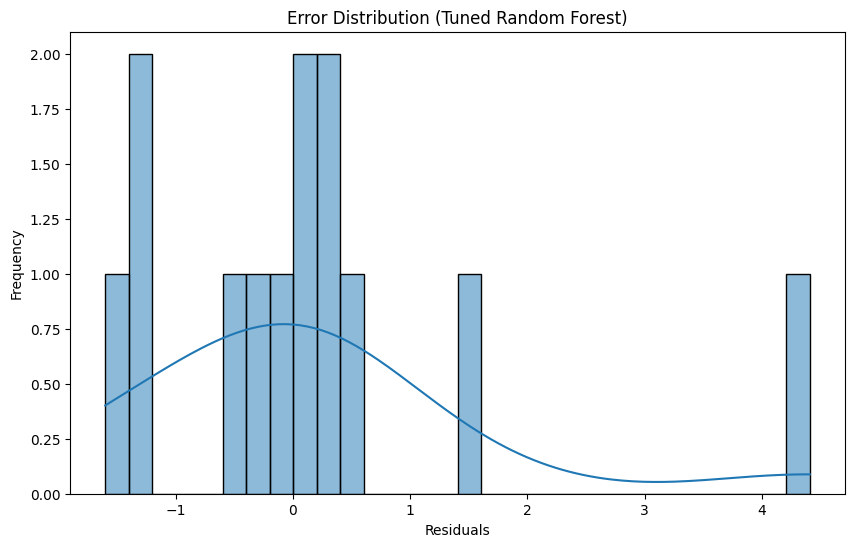

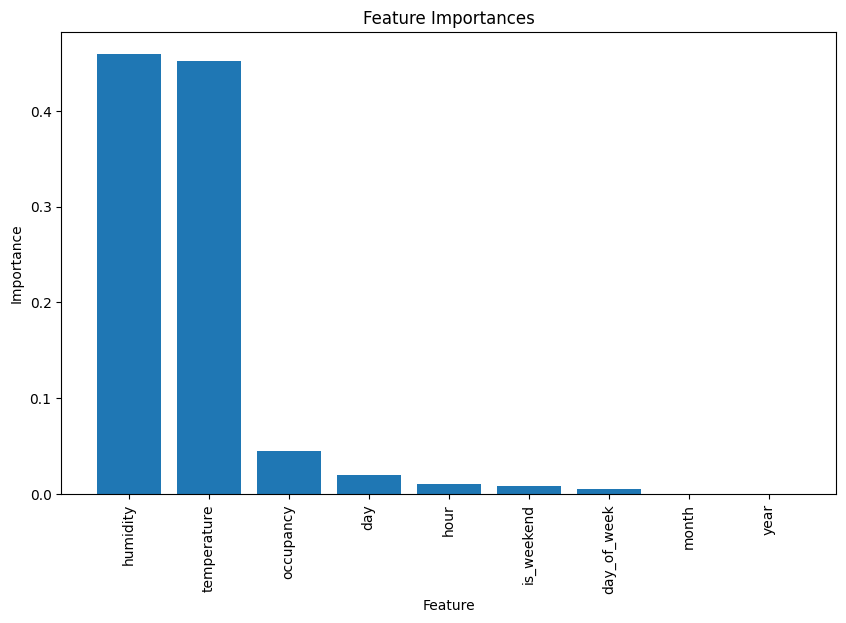

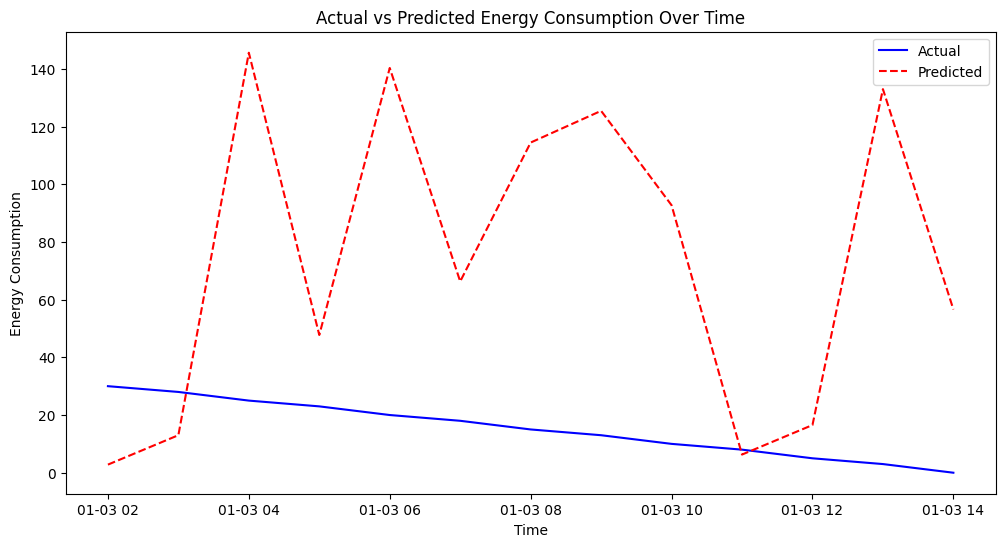

Predictions on new data:  [  2.81  13.01 145.59  47.74 140.3 ]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Step 1: Data Collection
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        logging.info("Data loaded successfully.")
        return df
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        return None

# Step 2: Data Preprocessing
def preprocess_data(df):
    try:
        # Convert 'datetime' column to datetime format
        df['datetime'] = pd.to_datetime(df['datetime'])

        # Feature engineering: Extract useful features from 'datetime'
        df['year'] = df['datetime'].dt.year
        df['month'] = df['datetime'].dt.month
        df['day'] = df['datetime'].dt.day
        df['hour'] = df['datetime'].dt.hour
        df['day_of_week'] = df['datetime'].dt.dayofweek  # Replace existing 'day_of_week' column
        df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Replace existing 'is_weekend' column

        # Drop the original 'datetime' column
        df = df.drop('datetime', axis=1)

        # Handle missing values (only for numeric columns)
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

        # Define features and target variable
        X = df.drop('energy_consumption', axis=1)
        y = df['energy_consumption']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        logging.info("Data preprocessing completed.")
        return X_train, X_test, y_train, y_test, X, y
    except Exception as e:
        logging.error(f"Error preprocessing data: {e}")
        return None, None, None, None, None, None

# Step 3: Model Training
def train_model(X_train, y_train):
    try:
        # Initialize models
        linear_model = LinearRegression()
        rf_model = RandomForestRegressor(random_state=42)

        # Train models
        linear_model.fit(X_train, y_train)
        rf_model.fit(X_train, y_train)

        logging.info("Models trained successfully.")
        return linear_model, rf_model
    except Exception as e:
        logging.error(f"Error training models: {e}")
        return None, None

# Step 4: Model Evaluation
def evaluate_model(model, X_test, y_test):
    try:
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        logging.info("Model evaluation completed.")
        return mae, mse, rmse, y_pred
    except Exception as e:
        logging.error(f"Error evaluating model: {e}")
        return None, None, None, None

# Step 5: Model Tuning (example using Random Forest)
def tune_model(X_train, y_train):
    try:
        rf_model = RandomForestRegressor(random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        logging.info("Model tuning completed.")
        return best_model
    except Exception as e:
        logging.error(f"Error tuning model: {e}")
        return None

# Step 6: Visualizations
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("Actual Energy Consumption")
    plt.ylabel("Predicted Energy Consumption")
    plt.title(f"Actual vs Predicted ({model_name})")
    plt.show()

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Energy Consumption")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot ({model_name})")
    plt.show()

def plot_feature_importance(model, feature_names):
    try:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title("Feature Importances")
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.show()
        logging.info("Feature importance plotted.")
    except Exception as e:
        logging.error(f"Error plotting feature importance: {e}")

def plot_time_series(df, y_test, y_pred):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df_test = df.iloc[-len(y_test):].copy()
    df_test['predicted_energy_consumption'] = y_pred
    plt.figure(figsize=(12, 6))
    plt.plot(df_test['datetime'], df_test['energy_consumption'], label="Actual", color='blue')
    plt.plot(df_test['datetime'], df_test['predicted_energy_consumption'], label="Predicted", color='red', linestyle='--')
    plt.xlabel("Time")
    plt.ylabel("Energy Consumption")
    plt.title("Actual vs Predicted Energy Consumption Over Time")
    plt.legend()
    plt.show()

def plot_error_distribution(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution ({model_name})")
    plt.show()

# Step 7: Model Deployment (making predictions on new data)
def make_predictions(model, new_data):
    try:
        predictions = model.predict(new_data)
        logging.info("Predictions made successfully.")
        return predictions
    except Exception as e:
        logging.error(f"Error making predictions: {e}")
        return None

if __name__ == "__main__":
    # Load and preprocess data
    file_path = 'energy_consumption_data.csv'  # Replace with your dataset path
    df = load_data(file_path)
    if df is not None:
        X_train, X_test, y_train, y_test, X, y = preprocess_data(df)
        if X_train is not None:
            # Train models
            linear_model, rf_model = train_model(X_train, y_train)
            if linear_model is not None and rf_model is not None:
                # Evaluate models
                linear_mae, linear_mse, linear_rmse, linear_y_pred = evaluate_model(linear_model, X_test, y_test)
                rf_mae, rf_mse, rf_rmse, rf_y_pred = evaluate_model(rf_model, X_test, y_test)

                print("Linear Regression - MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}".format(linear_mae, linear_mse, linear_rmse))
                print("Random Forest - MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}".format(rf_mae, rf_mse, rf_rmse))

                # Visualizations for Linear Regression
                plot_actual_vs_predicted(y_test, linear_y_pred, "Linear Regression")
                plot_residuals(y_test, linear_y_pred, "Linear Regression")
                plot_error_distribution(y_test, linear_y_pred, "Linear Regression")

                # Visualizations for Random Forest
                plot_actual_vs_predicted(y_test, rf_y_pred, "Random Forest")
                plot_residuals(y_test, rf_y_pred, "Random Forest")
                plot_error_distribution(y_test, rf_y_pred, "Random Forest")

                # Tune Random Forest model
                best_rf_model = tune_model(X_train, y_train)
                if best_rf_model is not None:
                    best_rf_mae, best_rf_mse, best_rf_rmse, best_rf_y_pred = evaluate_model(best_rf_model, X_test, y_test)
                    print("Tuned Random Forest - MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}".format(best_rf_mae, best_rf_mse, best_rf_rmse))

                    # Visualizations for Tuned Random Forest
                    plot_actual_vs_predicted(y_test, best_rf_y_pred, "Tuned Random Forest")
                    plot_residuals(y_test, best_rf_y_pred, "Tuned Random Forest")
                    plot_error_distribution(y_test, best_rf_y_pred, "Tuned Random Forest")

                    # Plot feature importance
                    feature_names = X.columns
                    plot_feature_importance(best_rf_model, feature_names)

                    # Time Series Plot
                    plot_time_series(df, y_test, best_rf_y_pred)

                    # Example of making predictions on new data
                    new_data = X_test[:5]  # Replace with actual new data
                    predictions = make_predictions(best_rf_model, new_data)
                    if predictions is not None:
                        print("Predictions on new data: ", predictions)